## Libraries

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer 

from sklearn.metrics import silhouette_score as ss

from sklearn_extra.cluster import KMedoids

import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

import plotly.express as px

import itertools

from matplotlib import gridspec 

from sklearn.cluster import OPTICS, cluster_optics_dbscan 

from fcmeans import FCM

from sklearn.datasets import make_blobs

from seaborn import scatterplot as scatter


In [2]:
saeb = pd.read_csv("saeb2021.csv")

In [3]:
saeb.head(10)

,Sigla da UF,Rede,TX_Apro,Indicador de Rendimento (P),SAEB_M,SAEB_P,Nota Média Padronizada (N),IDEB\n2021\n(N x P)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SG_UF,REDE,VL_APROVACAO_2021_SI_4,VL_INDICADOR_REND_2021,VL_NOTA_MATEMATICA_2021,VL_NOTA_PORTUGUES_2021,VL_NOTA_MEDIA_2021,VL_OBSERVADO_2021
3,RO,Municipal,100.0,1.00,ND,ND,-,-
4,RO,Estadual,-,-,-,-,-,-
5,RO,Municipal,98.7,0.99,ND,ND,-,-
6,RO,Municipal,-,-,-,-,-,-
7,RO,Estadual,96.8,0.97,258.05,272.48,5.51,5.3
8,RO,Municipal,-,-,-,-,-,-
9,RO,Municipal,-,-,-,-,-,-


In [4]:
saeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46253 entries, 0 to 46252
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sigla da UF                  46250 non-null  object
 1   Rede                         46248 non-null  object
 2   TX_Apro                      46248 non-null  object
 3   Indicador de Rendimento (P)  46248 non-null  object
 4   SAEB_M                       46248 non-null  object
 5   SAEB_P                       46248 non-null  object
 6   Nota Média Padronizada (N)   46248 non-null  object
 7   IDEB
2021
(N x P)            46248 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


In [5]:
saeb.isnull().sum()

Sigla da UF                    3
Rede                           5
TX_Apro                        5
Indicador de Rendimento (P)    5
SAEB_M                         5
SAEB_P                         5
Nota Média Padronizada (N)     5
IDEB\n2021\n(N x P)            5
dtype: int64

In [6]:
miss_vals = ["NaN", "ND", "-"]

In [7]:
saeb = pd.read_csv("saeb2021.csv", na_values = miss_vals)

In [8]:
saeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46253 entries, 0 to 46252
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sigla da UF                  46250 non-null  object
 1   Rede                         46248 non-null  object
 2   TX_Apro                      35164 non-null  object
 3   Indicador de Rendimento (P)  35164 non-null  object
 4   SAEB_M                       22219 non-null  object
 5   SAEB_P                       22219 non-null  object
 6   Nota Média Padronizada (N)   22219 non-null  object
 7   IDEB
2021
(N x P)            22213 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


In [9]:
saeb = saeb.dropna(axis = 0)

In [10]:
saeb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22213 entries, 2 to 46249
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sigla da UF                  22213 non-null  object
 1   Rede                         22213 non-null  object
 2   TX_Apro                      22213 non-null  object
 3   Indicador de Rendimento (P)  22213 non-null  object
 4   SAEB_M                       22213 non-null  object
 5   SAEB_P                       22213 non-null  object
 6   Nota Média Padronizada (N)   22213 non-null  object
 7   IDEB
2021
(N x P)            22213 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


In [11]:
saeb.tail()

,Sigla da UF,Rede,TX_Apro,Indicador de Rendimento (P),SAEB_M,SAEB_P,Nota Média Padronizada (N),IDEB\n2021\n(N x P)
46238,DF,Estadual,94.7,0.95,239.31,235.75,4.58,4.4
46240,DF,Estadual,93.9,0.95,259.99,270.43,5.51,5.2
46245,DF,Estadual,98.4,0.99,258.07,256.03,5.24,5.2
46246,DF,Estadual,96.2,0.96,245.02,256.19,5.02,4.8
46249,DF,Estadual,93.6,0.94,250.47,251.39,5.03,4.7


In [12]:
saeb["Rede"].unique()

array(['REDE', 'Estadual', 'Municipal', 'Federal'], dtype=object)

In [13]:
saeb["Rede"].value_counts()

Rede
Municipal    11818
Estadual     10385
Federal          9
REDE             1
Name: count, dtype: int64

In [14]:
saeb["rede_b"] = saeb["Rede"].map(lambda x: 0 if x == "Estadual" else (1 if x == "Municipal" else 2))

In [15]:
saeb["rede_b"].value_counts()

rede_b
1    11818
0    10385
2       10
Name: count, dtype: int64

In [16]:
saeb.head(1)

,Sigla da UF,Rede,TX_Apro,Indicador de Rendimento (P),SAEB_M,SAEB_P,Nota Média Padronizada (N),IDEB\n2021\n(N x P),rede_b
2,SG_UF,REDE,VL_APROVACAO_2021_SI_4,VL_INDICADOR_REND_2021,VL_NOTA_MATEMATICA_2021,VL_NOTA_PORTUGUES_2021,VL_NOTA_MEDIA_2021,VL_OBSERVADO_2021,2


In [17]:
saeb_m = saeb.loc[saeb["rede_b"] != 2, ["rede_b", "TX_Apro", "SAEB_M",]]

In [18]:
saeb_m.head(1)

,rede_b,TX_Apro,SAEB_M
7,0,96.8,258.05


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SAEB_M', ylabel='Count'>

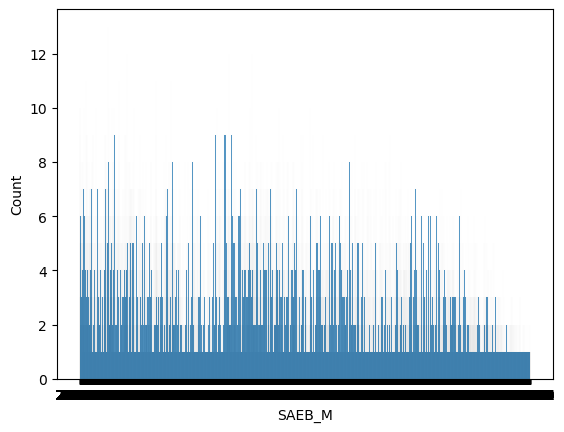

In [19]:
sns.histplot(data = saeb_m, x = "SAEB_M", bins = 20)

### Standardise

In [20]:
saeb_m.head(1)

,rede_b,TX_Apro,SAEB_M
7,0,96.8,258.05


In [21]:
scaler = StandardScaler()

In [22]:
saeb_m[["TX_Apro_T", "SAEB_T" ]] = scaler.fit_transform(
saeb_m[["TX_Apro", "SAEB_M" ]])

In [23]:
saeb_m.head(1)

,rede_b,TX_Apro,SAEB_M,TX_Apro_T,SAEB_T
7,0,96.8,258.05,-0.002089,0.291851


# K-means Clustering
Citation: https://www.youtube.com/watch?v=iNlZ3IU5Ffw

### Elbow Plot

In [24]:
def optimise (data, max_k):
    means = []
    inertia = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = 10)
        kmeans.fit(data)
        
        means.append(k)
        inertia.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize = (12, 6))
    plt.plot(means, inertia, "*-")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    

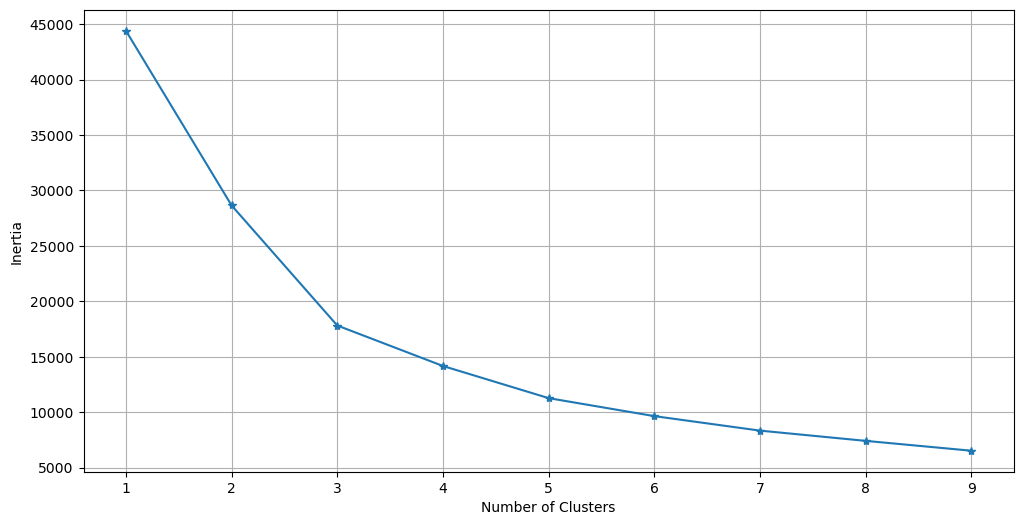

In [27]:
optimise(saeb_m[["SAEB_T", "TX_Apro_T"]], 10)

### Applying K-Means

In [28]:
kmeans = KMeans(n_clusters = 2)

In [29]:
kmeans.fit(saeb_m[["SAEB_T", "TX_Apro_T"]])

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [30]:
saeb_m["kmeans_2"] = kmeans.labels_

In [31]:
saeb_m.tail()

,rede_b,TX_Apro,SAEB_M,TX_Apro_T,SAEB_T,kmeans_2
46238,0,94.7,239.31,-0.399393,-0.510189,0
46240,0,93.9,259.99,-0.550747,0.374880,0
46245,0,98.4,258.07,0.300620,0.292707,0
46246,0,96.2,245.02,-0.115604,-0.265811,0
46249,0,93.6,250.47,-0.607505,-0.032560,0


### Plotting the Results

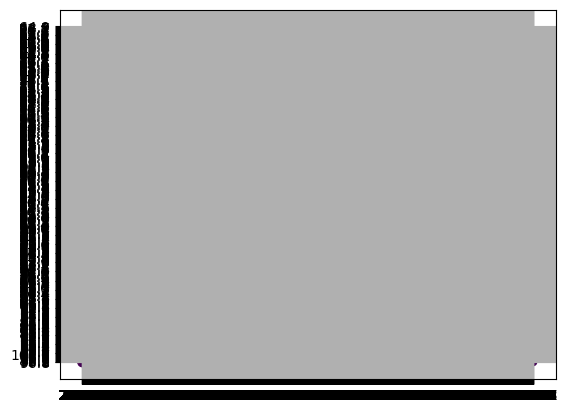

In [45]:
plt.scatter(x = saeb_m["SAEB_M"], y = saeb_m["TX_Apro"], 
           c = saeb_m["kmeans_2"])
#plt.xlim(2.4 , 8.2)
#plt.ylim(0.5, 1.1)
plt.grid(True)
plt.show()

In [34]:
silhouette_avg = ss(saeb_m[["SAEB_T", "TX_Apro_T"]], kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5233864650704291


In [36]:
for k in range(1, 4):
    kmeans = KMeans(n_clusters = k, n_init = 10)
    kmeans.fit(saeb_m[["SAEB_T", "TX_Apro_T"]])
    saeb_m[f'KMeans{k}'] = kmeans.labels_

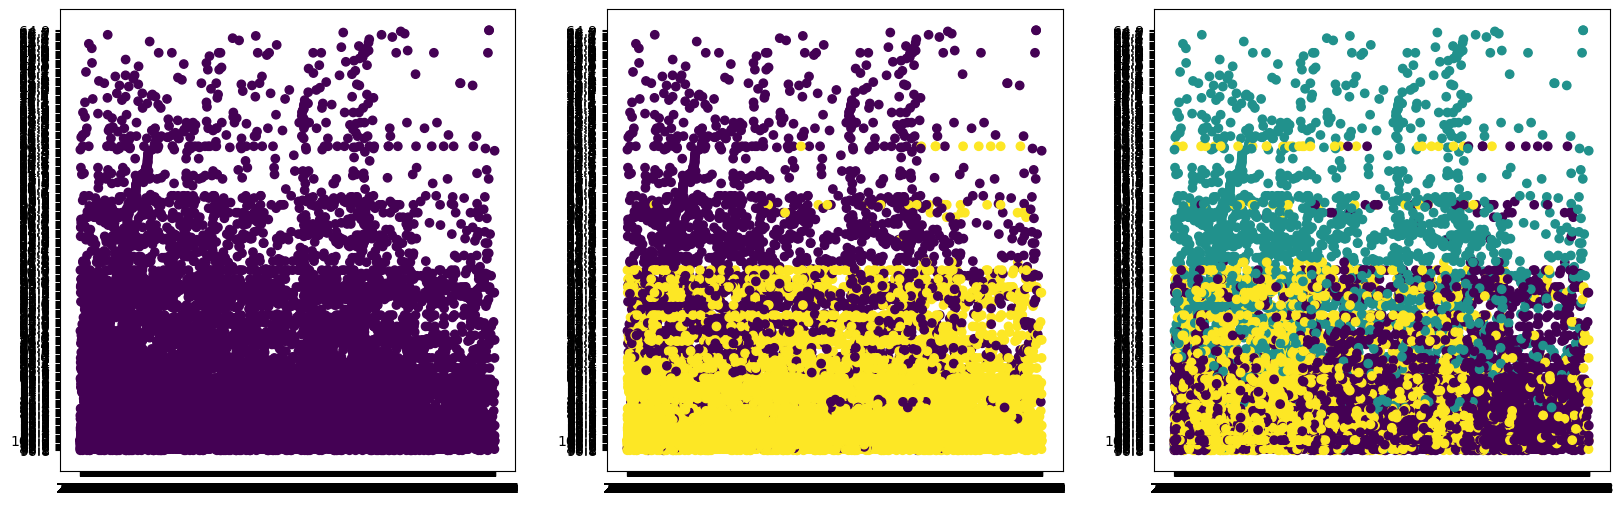

In [38]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

for i, ax in enumerate(fig.axes, start = 1):
    ax.scatter(x = saeb_m["SAEB_M"], y = saeb_m["TX_Apro"], 
              c = saeb_m[f'KMeans{i}'])

In [39]:
kmedoids = KMedoids(n_clusters = 4, random_state = 12)
kmedoids.fit(saeb_m[["SAEB_T", "TX_Apro_T"]])

km_labels = kmedoids.labels_

medoids = kmedoids.medoid_indices_

print("Cluster Labels:", km_labels)
print("Cluster Medoids:", medoids)


Cluster Labels: [3 3 0 ... 3 3 0]
Cluster Medoids: [ 1288 14939  7597 16588]


In [40]:
saeb_m["KMedoids"] = km_labels

In [41]:
saeb_m["KMedoids"].value_counts()

KMedoids
3    8040
1    5832
2    4919
0    3412
Name: count, dtype: int64

In [42]:
saeb_m.groupby("KMedoids").median()

TypeError: agg function failed [how->median,dtype->object]

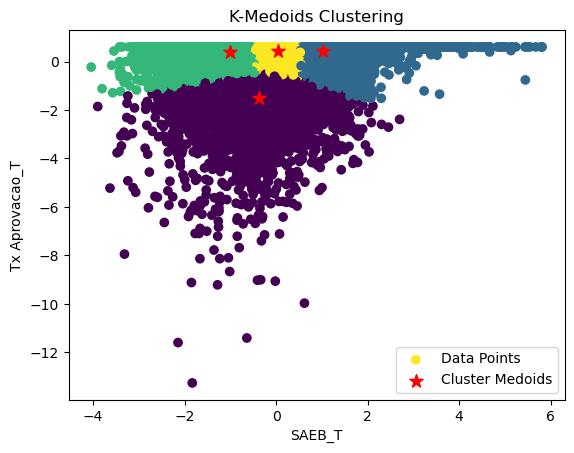

In [43]:
def assign_labels(data, medoid_indices):
    labels = np.zeros(len(data))
    for i, point in enumerate(data):
        labels[i] = np.argmin(np.linalg.norm(point - data[medoid_indices], axis = 1))
    return labels.astype(int)

km_labels = assign_labels(saeb_m[["SAEB_T", "TX_Apro_T"]].values, medoids)

plt.scatter(saeb_m["SAEB_T"], saeb_m["TX_Apro_T"], c = km_labels, cmap = 'viridis', 
            label = 'Data Points')

plt.scatter(saeb_m["SAEB_T"].iloc[medoids], saeb_m["TX_Apro_T"].iloc[medoids], 
            marker = "*", s = 100, c = 'red', label = 'Cluster Medoids')

plt.title('K-Medoids Clustering')
plt.xlabel('SAEB_T')
plt.ylabel('Tx Aprovacao_T')
plt.legend()
plt.show()

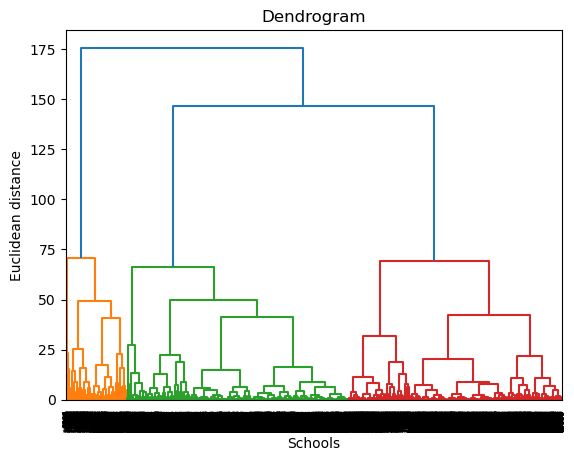

In [46]:
dendrogrm = sch.dendrogram(sch.linkage(saeb_m[["SAEB_T", "TX_Apro_T"]], method = "ward"))
plt.title('Dendrogram')
plt.xlabel("Schools")
plt.ylabel('Euclidean distance')
plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


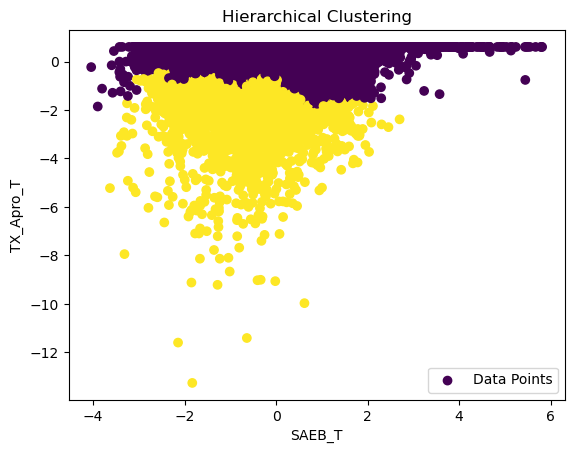

In [48]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc.fit(saeb_m[["SAEB_T", "TX_Apro_T"]])

cluster_labels = hc.labels_

plt.scatter(saeb_m["SAEB_T"], saeb_m["TX_Apro_T"], c=cluster_labels, cmap='viridis', label='Data Points')

plt.title('Hierarchical Clustering')
plt.xlabel('SAEB_T')
plt.ylabel('TX_Apro_T')
plt.legend()
plt.show()


In [49]:


# Create the DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to your data
dbscan.fit(saeb_m[["SAEB_T", "TX_Apro"]])

# Get the cluster labels
cluster_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 8
Estimated number of noise points: 152


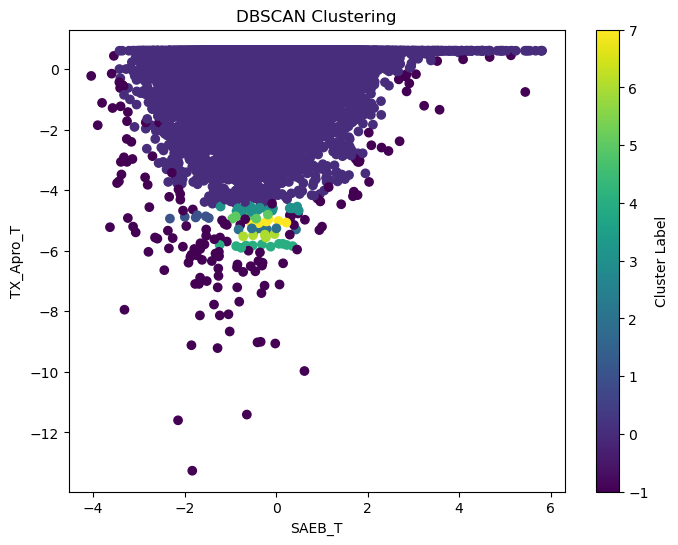

In [50]:
import matplotlib.pyplot as plt

# Extract coordinates of the clusters
x = saeb_m["SAEB_T"]
y = saeb_m["TX_Apro_T"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=cluster_labels, cmap='viridis')
plt.xlabel('SAEB_T')
plt.ylabel('TX_Apro_T')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


In [54]:
# import KMeans library for clustering
from sklearn.cluster import KMeans

# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, random_state = 38)

# n_initial, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(saeb_m[["SAEB_T", "TX_Apro_T"]])

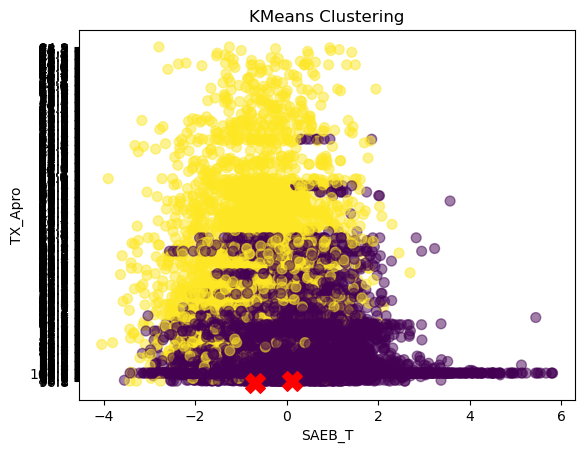

In [55]:
import matplotlib.pyplot as plt

# Extracting the centroids
centroids = kmeans.cluster_centers_

# Plotting the clusters
plt.scatter(saeb_m["SAEB_T"], saeb_m["TX_Apro"], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)  # Plotting centroids
plt.xlabel('SAEB_T')
plt.ylabel('TX_Apro')
plt.title('KMeans Clustering')
plt.show()
